In [1]:
import h5py

# 打开HDF5文件
file = h5py.File('/mnt/disk1/xiaojk/data/DLPFC/GSM5138547_snRNAseq.h5', 'r')

# 查看根组（root group）中的键
keys = list(file.keys())
print(keys)

# 遍历文件中的所有组和数据集
def print_keys(name):
    print(name)

file.visit(print_keys)

# 关闭HDF5文件
file.close()


['matrix']
matrix
matrix/barcodes
matrix/data
matrix/features
matrix/features/_all_tag_keys
matrix/features/feature_type
matrix/features/genome
matrix/features/id
matrix/features/name
matrix/indices
matrix/indptr
matrix/shape


In [2]:
import h5py

# 打开 HDF5 文件
hdf5_file = h5py.File('/mnt/disk1/xiaojk/data/DLPFC/GSM5138547_snRNAseq.h5', 'r')

# 获取 matrix 数据集中的所有子数据集名称
matrix_datasets = hdf5_file['matrix'].keys()

# 遍历每个子数据集并展示信息
for dataset_name in matrix_datasets:
    dataset = hdf5_file['matrix'][dataset_name]
    print(f"Dataset: {dataset_name}")
    if isinstance(dataset, h5py.Dataset):
        print(f"Shape: {dataset.shape}")
        print(f"Data: {dataset[...]}")
    elif isinstance(dataset, h5py.Group):
        # 遍历组内的数据集
        for subgroup_name, subgroup in dataset.items():
            print(f"Subgroup: {dataset_name}/{subgroup_name}")
            print(f"Shape: {subgroup.shape}")
            print(f"Data: {subgroup[...]}")
    print("=" * 30)

# 关闭 HDF5 文件
hdf5_file.close()


Dataset: barcodes
Shape: (8764,)
Data: [b'AAACCCAAGACGACGT-1' b'AAACCCAAGATGTAGT-1' b'AAACCCAAGGGTCAAC-1' ...
 b'TTTGGTTTCTCCCATG-1' b'TTTGTTGCAGGCTACC-1' b'TTTGTTGTCACCATGA-1']
Dataset: data
Shape: (19135535,)
Data: [4 1 2 ... 1 1 1]
Dataset: features
Subgroup: features/_all_tag_keys
Shape: (1,)
Data: [b'genome']
Subgroup: features/feature_type
Shape: (32738,)
Data: [b'Gene Expression' b'Gene Expression' b'Gene Expression' ...
 b'Gene Expression' b'Gene Expression' b'Gene Expression']
Subgroup: features/genome
Shape: (32738,)
Data: [b'hg19_premrna_v3' b'hg19_premrna_v3' b'hg19_premrna_v3' ...
 b'hg19_premrna_v3' b'hg19_premrna_v3' b'hg19_premrna_v3']
Subgroup: features/id
Shape: (32738,)
Data: [b'ENSG00000243485' b'ENSG00000237613' b'ENSG00000186092' ...
 b'ENSG00000251180' b'ENSG00000215616' b'ENSG00000215611']
Subgroup: features/name
Shape: (32738,)
Data: [b'MIR1302-10' b'FAM138A' b'OR4F5' ... b'CU459201.1' b'AC002321.2'
 b'AC002321.1']
Dataset: indices
Shape: (19135535,)
Data: [327

In [3]:
import h5py
import anndata
import scipy
# 1. Open.h5 file
h5_file = h5py.File('/mnt/disk1/xiaojk/data/DLPFC/GSM5138547_snRNAseq.h5', 'r')

# Extract necessary data elements
shape = h5_file['matrix']['shape'][:]
barcodes = h5_file['matrix']['barcodes'][:]
feature_names = h5_file['matrix']['features']['name'][:]
feature_type = h5_file['matrix']['features']['feature_type'][:]
genome = h5_file['matrix']['features']['genome'][:]
feature_id = h5_file['matrix']['features']['id'][:]

# Decode byte literals to strings
feature_names = [name.decode() for name in feature_names]
feature_type = [ftype.decode() for ftype in feature_type]
genome = [gen.decode() for gen in genome]
feature_id = [fid.decode() for fid in feature_id]
barcodes = [barcode.decode() for barcode in barcodes]

indices = h5_file['matrix']['indices'][:]
indptr = h5_file['matrix']['indptr'][:]
data = h5_file['matrix']['data'][:]

# Create csr_matrix
sparse_matrix = scipy.sparse.csr_matrix((data, indices, indptr), shape=(shape[1], shape[0]))

# Create anndata object and set attributes
adata = anndata.AnnData(X=sparse_matrix)
adata.obs_names = barcodes
adata.var_names = feature_names

# Add feature data to adata.var
adata.var['feature_type'] = feature_type
adata.var['genome'] = genome
adata.var['feature_id'] = feature_id

# Close the .h5 file
h5_file.close()

# You can now use the adata object for further analysis and processing
print(adata)

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 8764 × 32738
    var: 'feature_type', 'genome', 'feature_id'


In [4]:
adata.obs

""
AAACCCAAGACGACGT-1
AAACCCAAGATGTAGT-1
AAACCCAAGGGTCAAC-1
AAACCCAAGTCTGCAT-1
AAACCCAGTCTCTCCA-1
...
TTTGGTTTCACTACGA-1
TTTGGTTTCCGGACTG-1
TTTGGTTTCTCCCATG-1
TTTGTTGCAGGCTACC-1


In [5]:
import numpy as np
import pandas as pd
import scanpy as sc

In [6]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.21.6 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [7]:
results_file = '/mnt/disk1/xiaojk/data/DLPFC/GSM5138547_snRNAseq.h5ad'  # the file that will store the analysis results

In [8]:
adata.var_names_make_unique() 

In [9]:
adata

AnnData object with n_obs × n_vars = 8764 × 32738
    var: 'feature_type', 'genome', 'feature_id'

normalizing counts per cell
    finished (0:00:00)


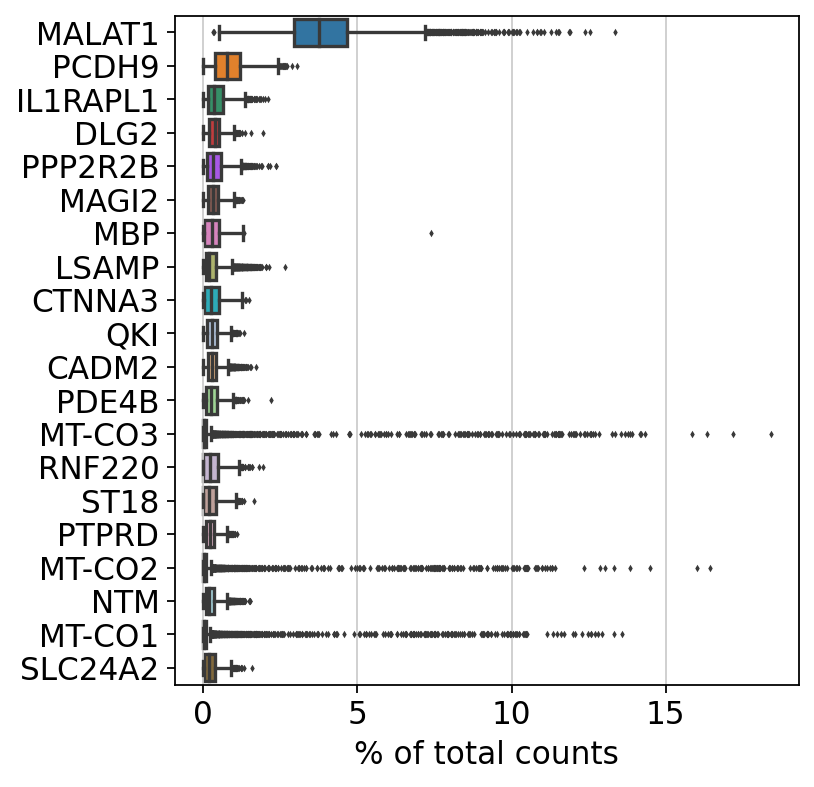

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 7341 genes that are detected in less than 3 cells


In [12]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

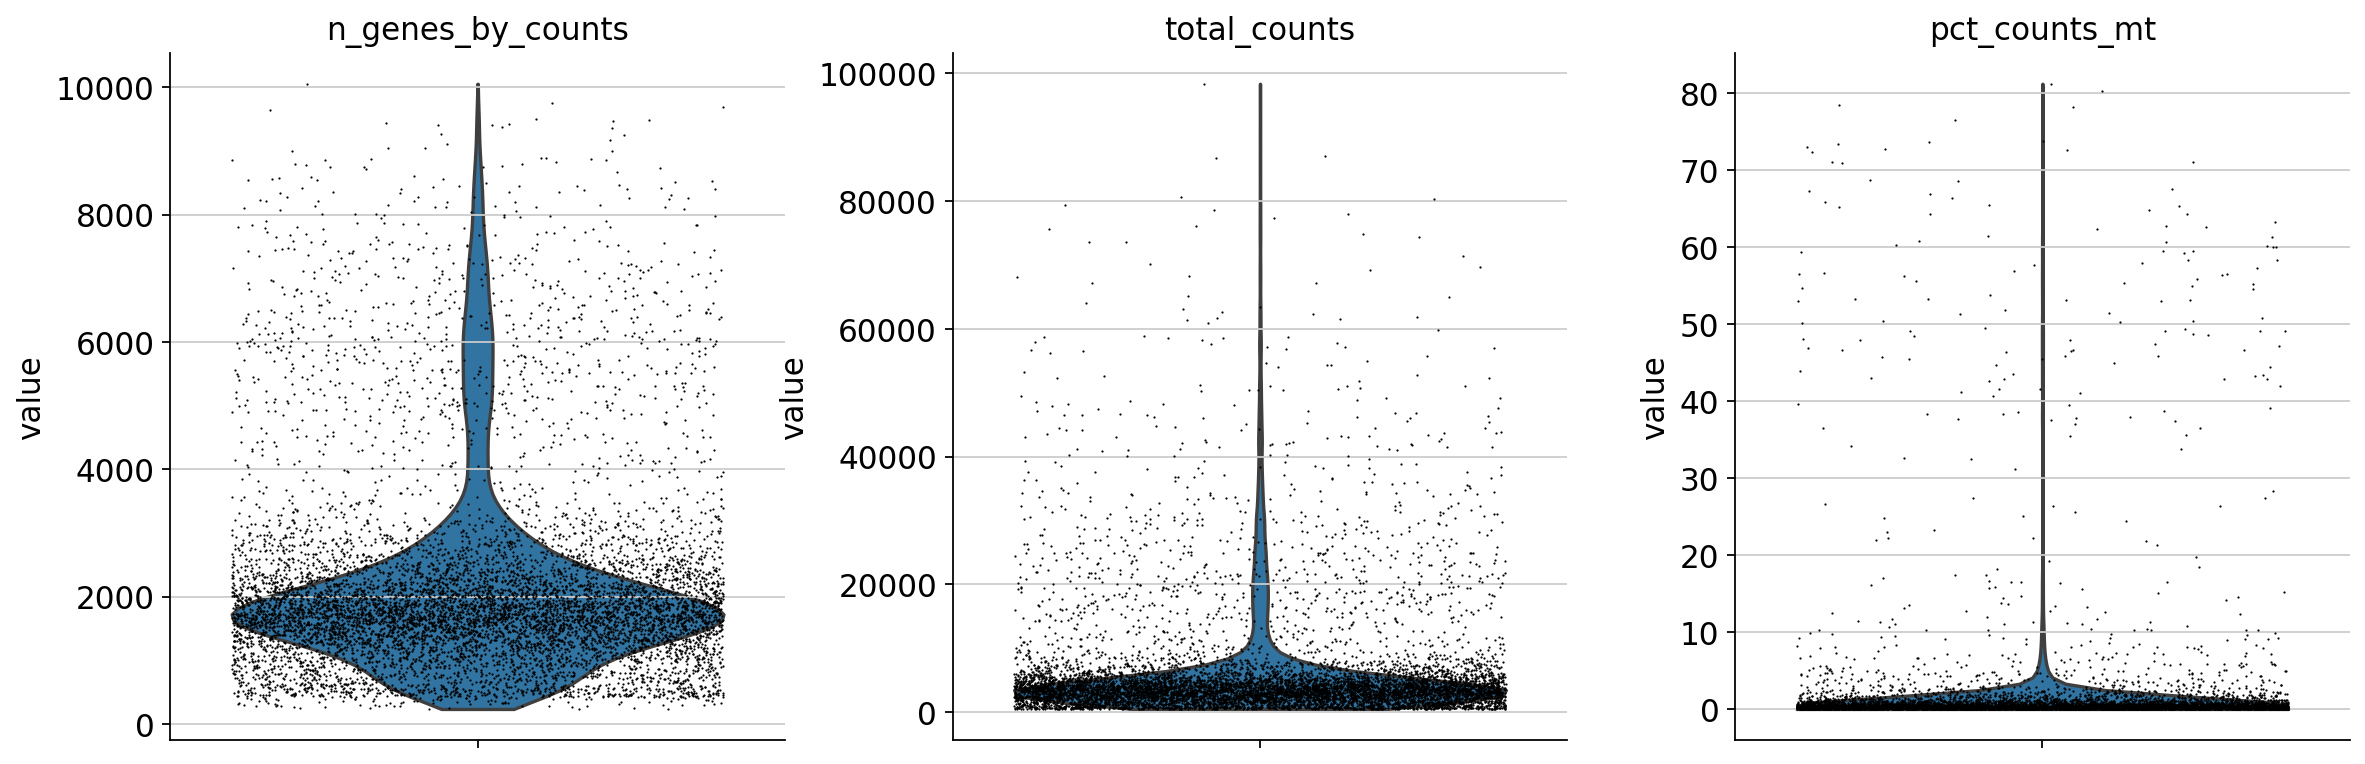

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

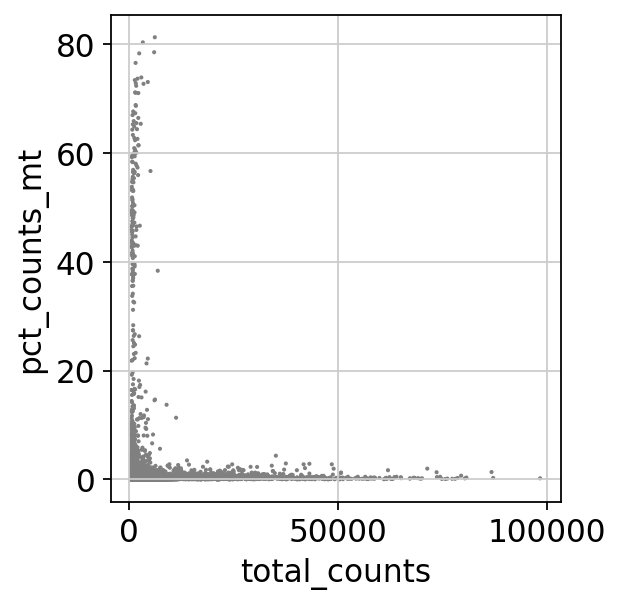

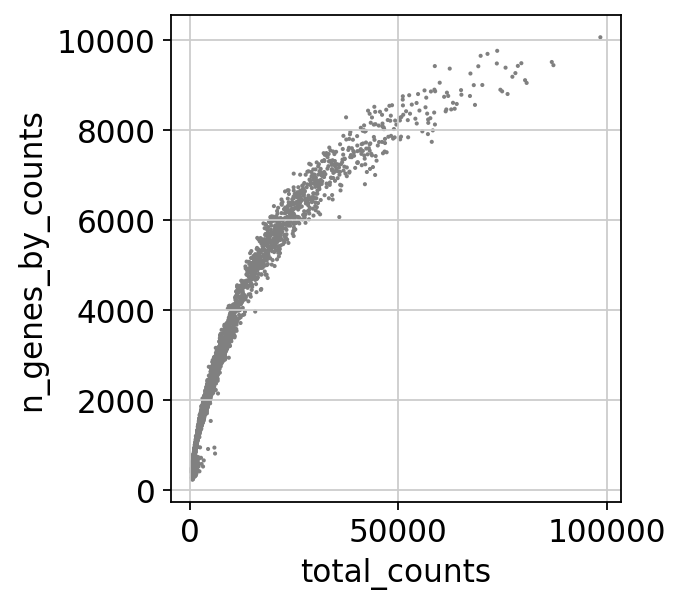

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [15]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell


/mnt/disk1/xiaojk/anaconda/envs/scGLUE1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [17]:
sc.pp.log1p(adata)

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


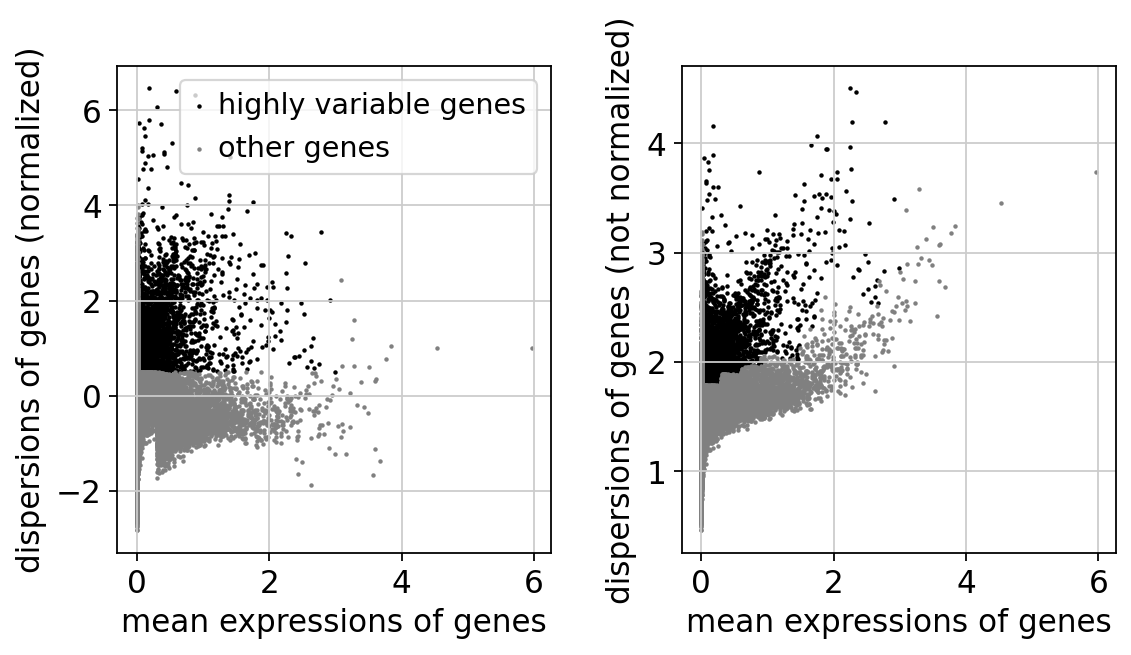

In [19]:
sc.pl.highly_variable_genes(adata)

In [20]:
adata.raw = adata

In [21]:
adata = adata[:, adata.var.highly_variable]

In [22]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:12)


In [23]:
sc.pp.scale(adata, max_value=10)

In [24]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


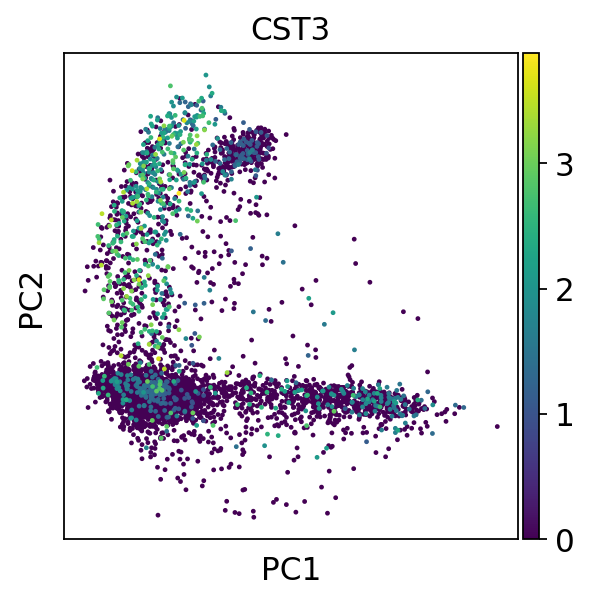

In [25]:
sc.pl.pca(adata, color='CST3')

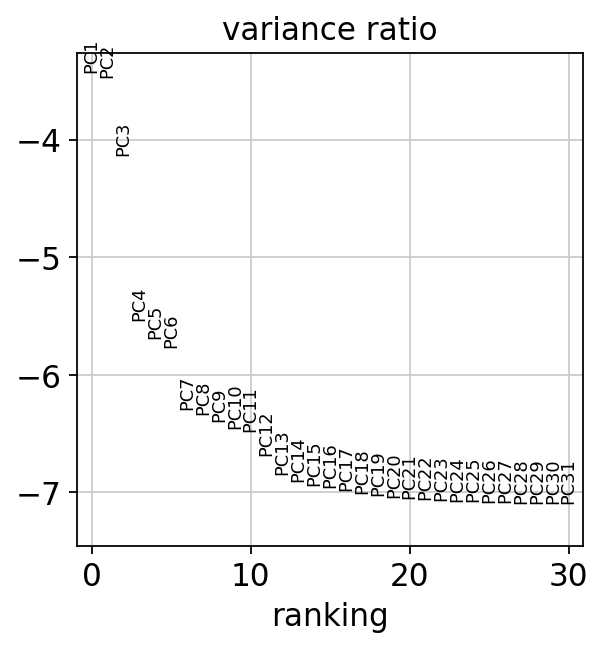

In [26]:
sc.pl.pca_variance_ratio(adata, log=True)

In [27]:
adata.write(results_file)

In [28]:
adata

AnnData object with n_obs × n_vars = 6505 × 4921
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_type', 'genome', 'feature_id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [29]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [30]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


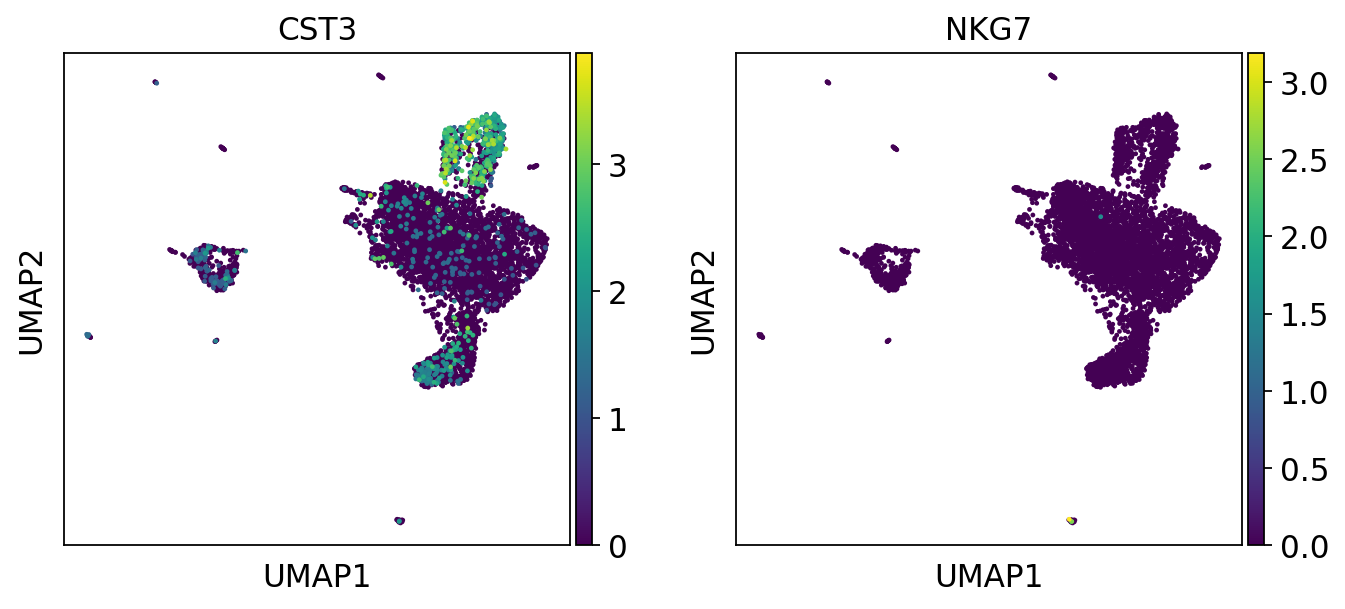

In [31]:
sc.pl.umap(adata, color=['CST3', 'NKG7'])

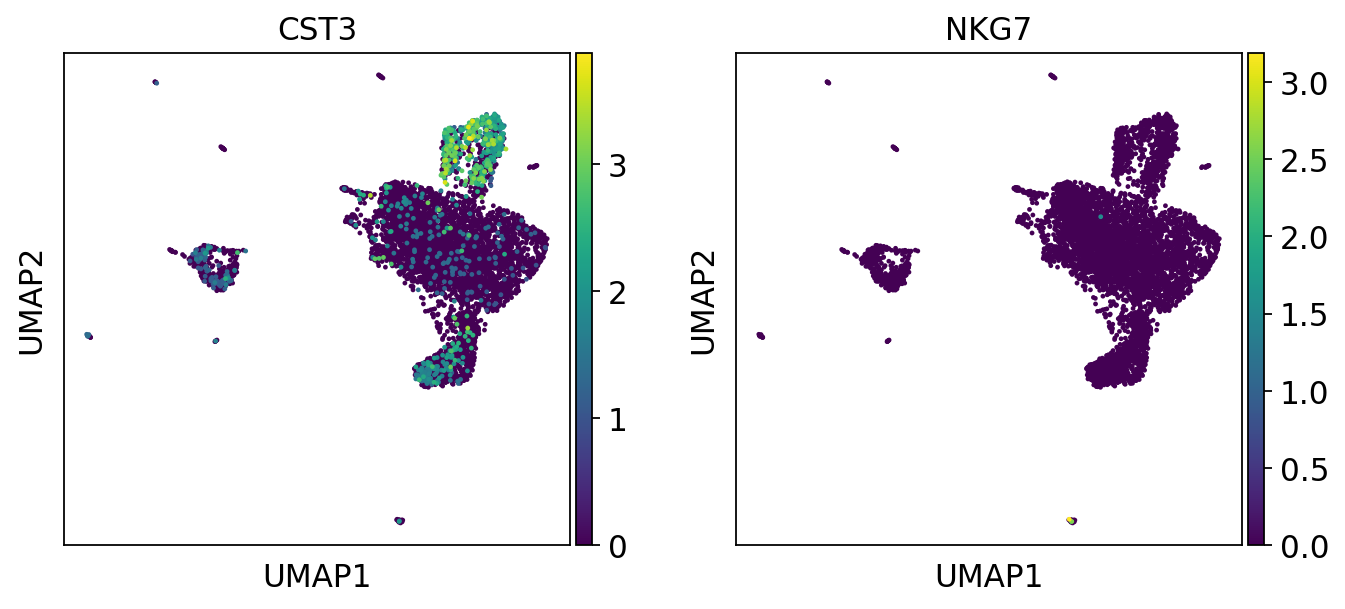

In [32]:
sc.pl.umap(adata, color=['CST3', 'NKG7'])

In [33]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


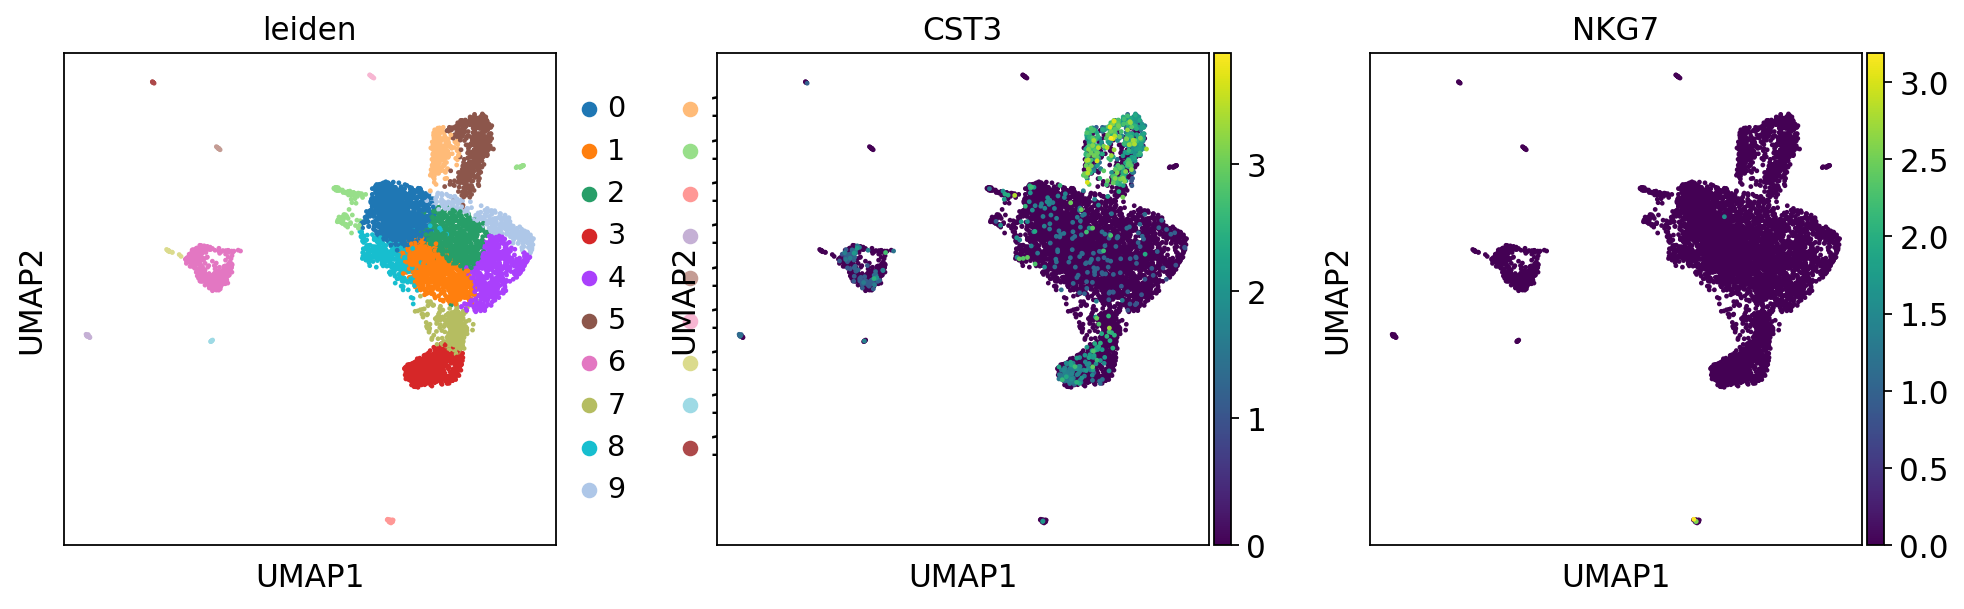

In [34]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [35]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


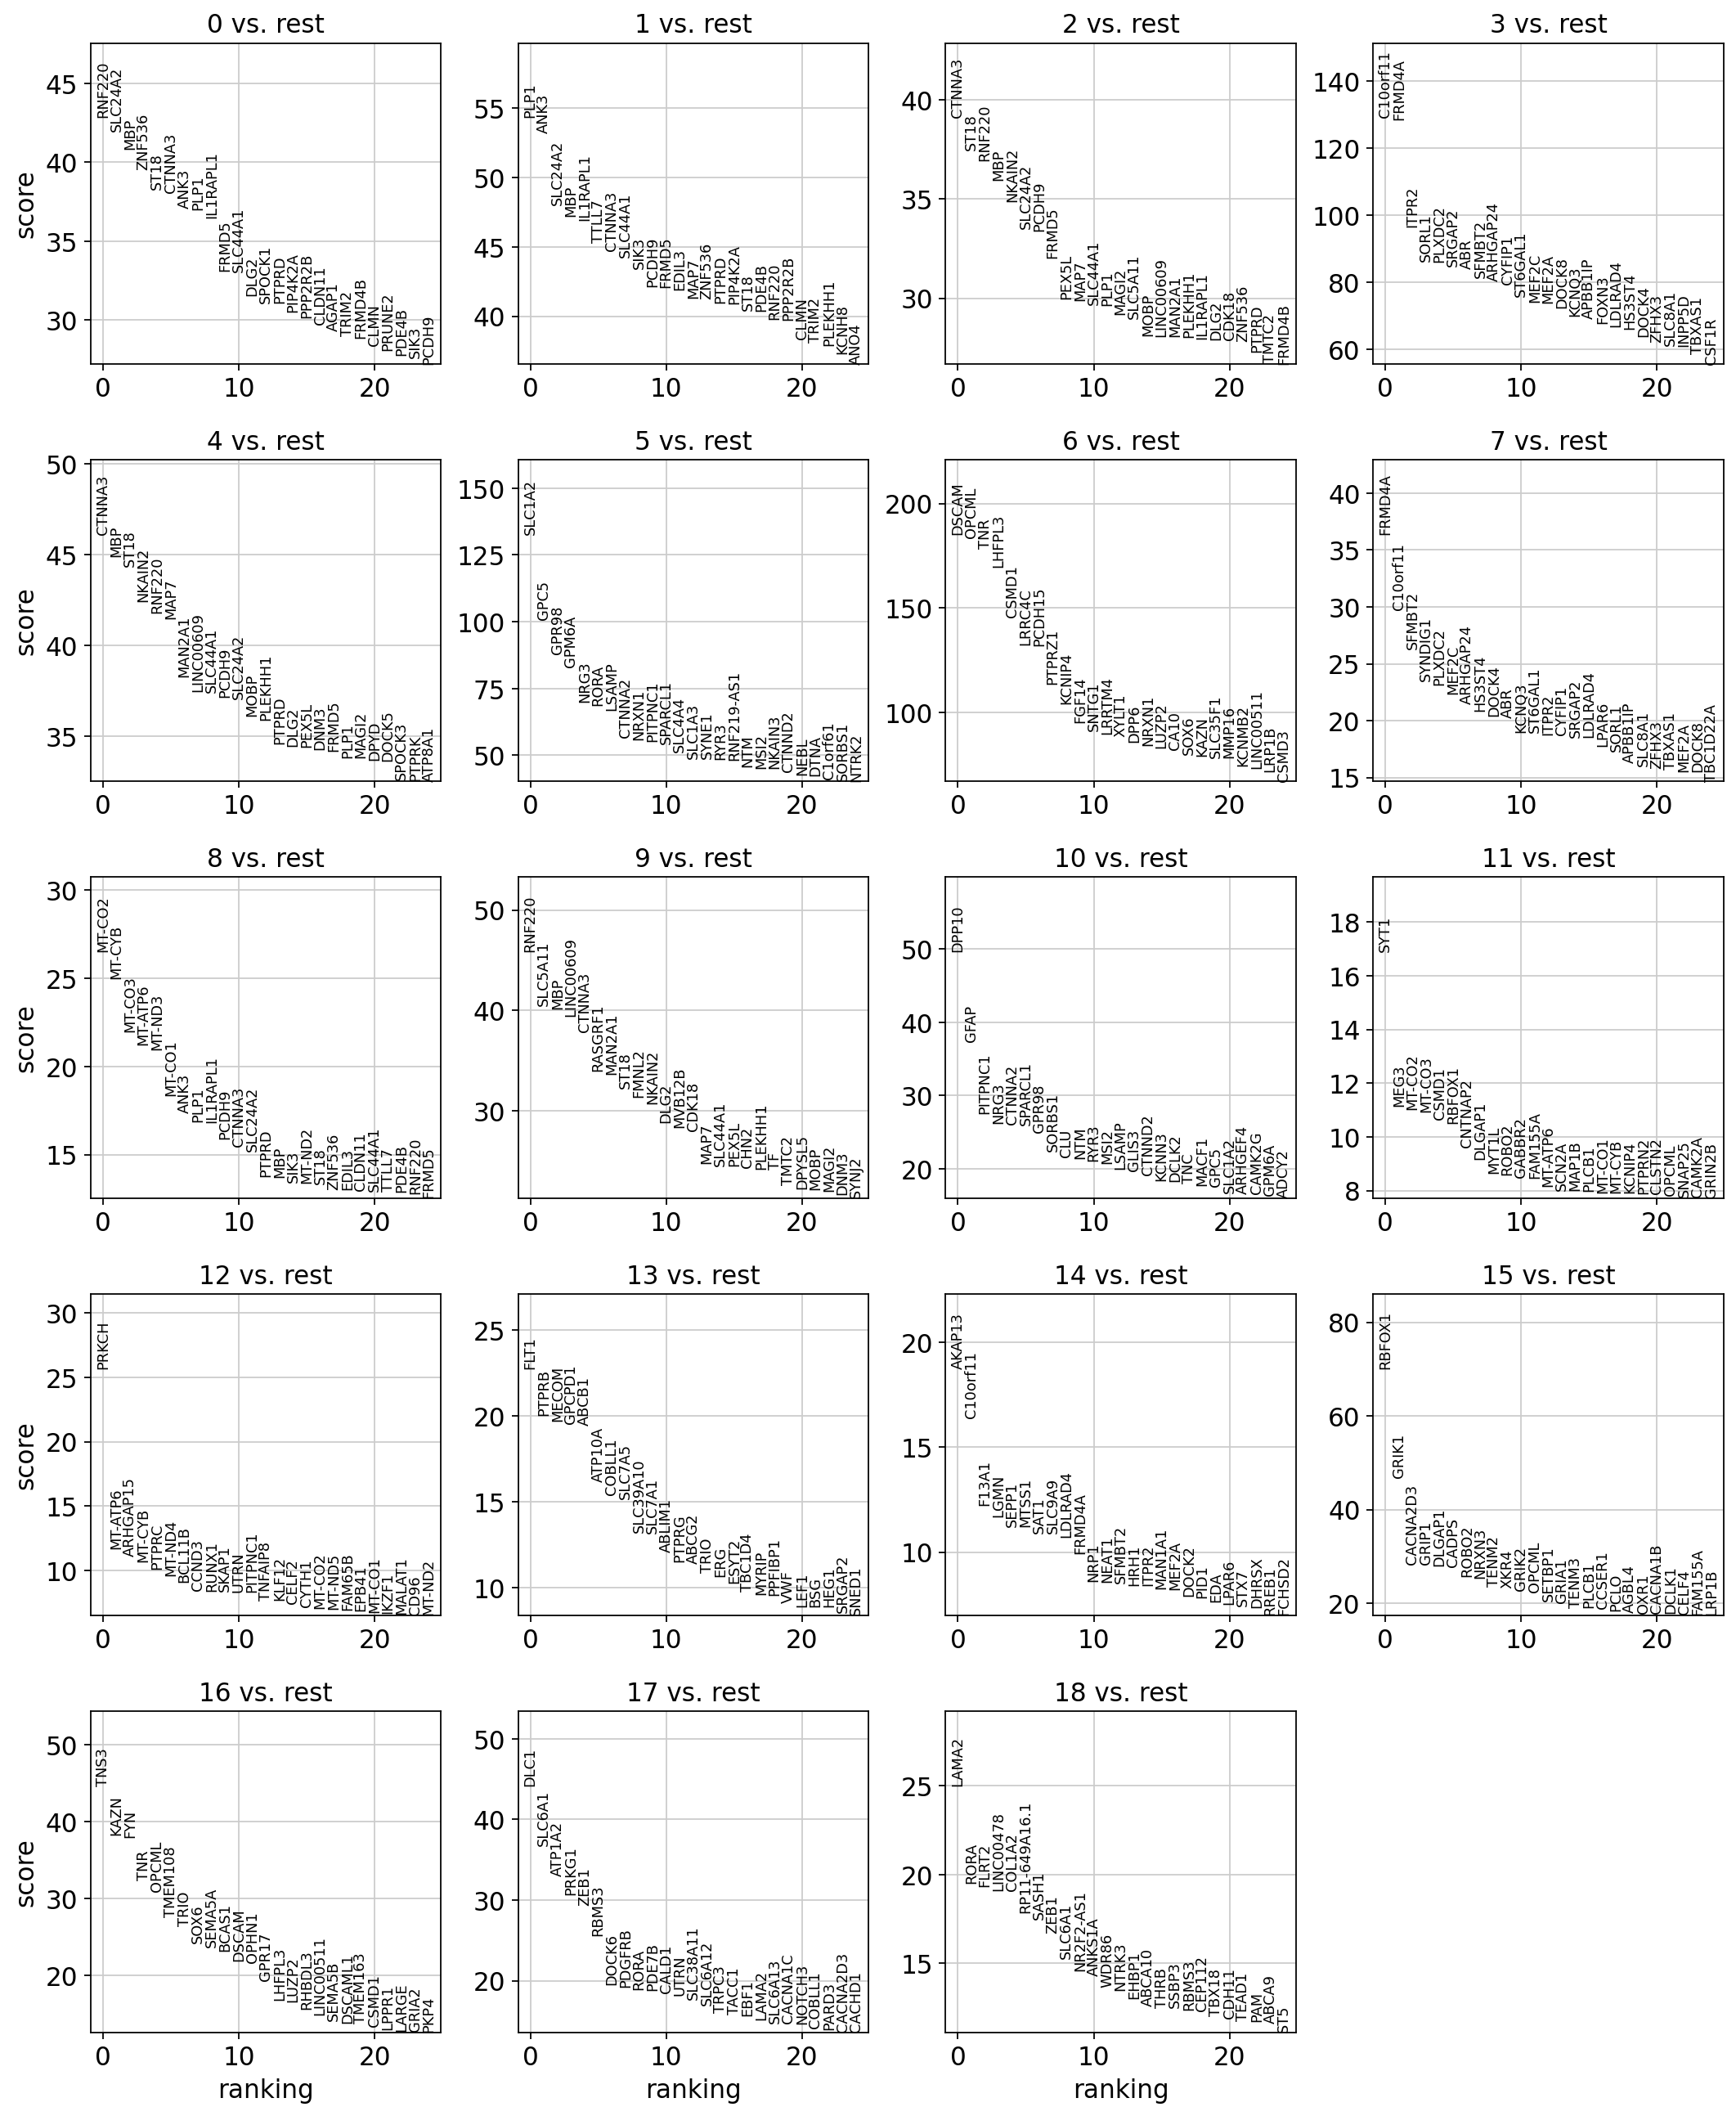

In [36]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [37]:
sc.settings.verbosity = 2  # reduce the verbosity

In [38]:
adata.write(results_file)

In [40]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCCAAGATGTAGT-1,1797,1797,3447,3,0.087032,9
AAACCCAAGGGTCAAC-1,1897,1897,4026,11,0.273224,1
AAACCCAAGTCTGCAT-1,2174,2174,4970,20,0.402414,4
AAACCCAGTCTCTCCA-1,474,474,536,12,2.238806,11
AAACGAACACTATCGA-1,1327,1327,2011,17,0.845351,5
...,...,...,...,...,...,...
TTTGGTTGTGCTTATG-1,2352,2352,5572,3,0.053841,4
TTTGGTTTCACTACGA-1,976,976,1309,10,0.763942,3
TTTGGTTTCCGGACTG-1,2076,2076,4500,28,0.622222,1
TTTGGTTTCTCCCATG-1,1305,1305,2008,6,0.298805,5


In [68]:
meta_data = pd.read_csv("/mnt/disk1/xiaojk/data/DLPFC/RL2085_meta.tsv", sep='\t')

In [69]:
meta_data

,cellId,barcode,sample,stage,cell_type,arcsin_age
0,RL2085#GTGATCACACAGCCAC-1,RL2085#GTGATCACACAGCCAC-1,RL2085,Adult,L4,4.286905
1,RL2085#ACCCAAACATGCACTA-1,RL2085#ACCCAAACATGCACTA-1,RL2085,Adult,MGE der,4.286905
2,RL2085#ACCTGCTAGGTAAGCC-1,RL2085#ACCTGCTAGGTAAGCC-1,RL2085,Adult,OPC,4.286905
3,RL2085#ACAAACCCAATTGCCA-1,RL2085#ACAAACCCAATTGCCA-1,RL2085,Adult,Micro,4.286905
4,RL2085#TGGTCAATCGCTAGTA-1,RL2085#TGGTCAATCGCTAGTA-1,RL2085,Adult,Micro,4.286905
...,...,...,...,...,...,...
5593,RL2085#CTCTACGTCGCACCTT-1,RL2085#CTCTACGTCGCACCTT-1,RL2085,Adult,CGE der,4.286905
5594,RL2085#AACATCGTCTGCTACC-1,RL2085#AACATCGTCTGCTACC-1,RL2085,Adult,CGE der,4.286905
5595,RL2085#GGAGAACTCGCTCTAC-1,RL2085#GGAGAACTCGCTCTAC-1,RL2085,Adult,L2/3,4.286905
5596,RL2085#TGCATTTCATTACTCT-1,RL2085#TGCATTTCATTACTCT-1,RL2085,Adult,L4,4.286905


In [86]:
# 获取每个 obs_names 对应的 cell_type
obs_cell_types = []

for obs_name in adata.obs_names:
    matching_cell_types = []
    
    for cell_id, cell_type in zip(meta_data['cellId'], meta_data['cell_type']):
        if "TTTGGTTGTGCTTATG" in cell_id:
            print("1")
            matching_cell_types.append(cell_type)
    
    if matching_cell_types:
        obs_cell_types.append(', '.join(matching_cell_types))
    else:
        obs_cell_types.append('')

# 将获取的 cell_types 添加到 adata.obs['feature']
adata.obs['feature'] = obs_cell_types